In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\2':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\2')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_25284\1787053321.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

In [2]:
import numpy as np

def classify_kNN(inX, X, y, k=5):
    # compute the distance between each row of X and Xmat
    Dmat = np.sqrt(((inX - X)**2).sum(axis=1))
    # sort by distance
    k = min(k, Dmat.shape[0])
    argsorted = Dmat.argsort()[:k]
    relatedy = y[argsorted]
    # count the freq. of the first k labels
    labelcounts = np.unique(relatedy, return_counts=True)
    # find the label with the most counts
    label = labelcounts[0][labelcounts[1].argmax()]
    return label

In [3]:
#| eval: false
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, weights='uniform',
                           algorithm='brute', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [4]:
import numpy as np

def encodeNorm(X, parameters=None):
    # parameters contains minVals and ranges
    if parameters is None:
        minVals = np.min(X, axis=0)
        maxVals = np.max(X, axis=0)
        ranges = np.maximum(maxVals - minVals, np.ones(minVals.size))
        parameters = {'ranges': ranges, 'minVals': minVals}
    else:
        minVals = parameters['minVals']
        ranges = parameters['ranges']
    Nmat = np.tile(minVals, (X.shape[0], 1))
    Xnorm = (X - Nmat)/ranges
    return (Xnorm, parameters)


def decodeNorm(X, parameters):
    # parameters contains minVals and ranges
    ranges = parameters['ranges']
    minVals = parameters['minVals']
    Nmat = np.tile(minVals, (X.shape[0], 1))
    Xoriginal = X * ranges + Nmat
    return Xoriginal

In [5]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

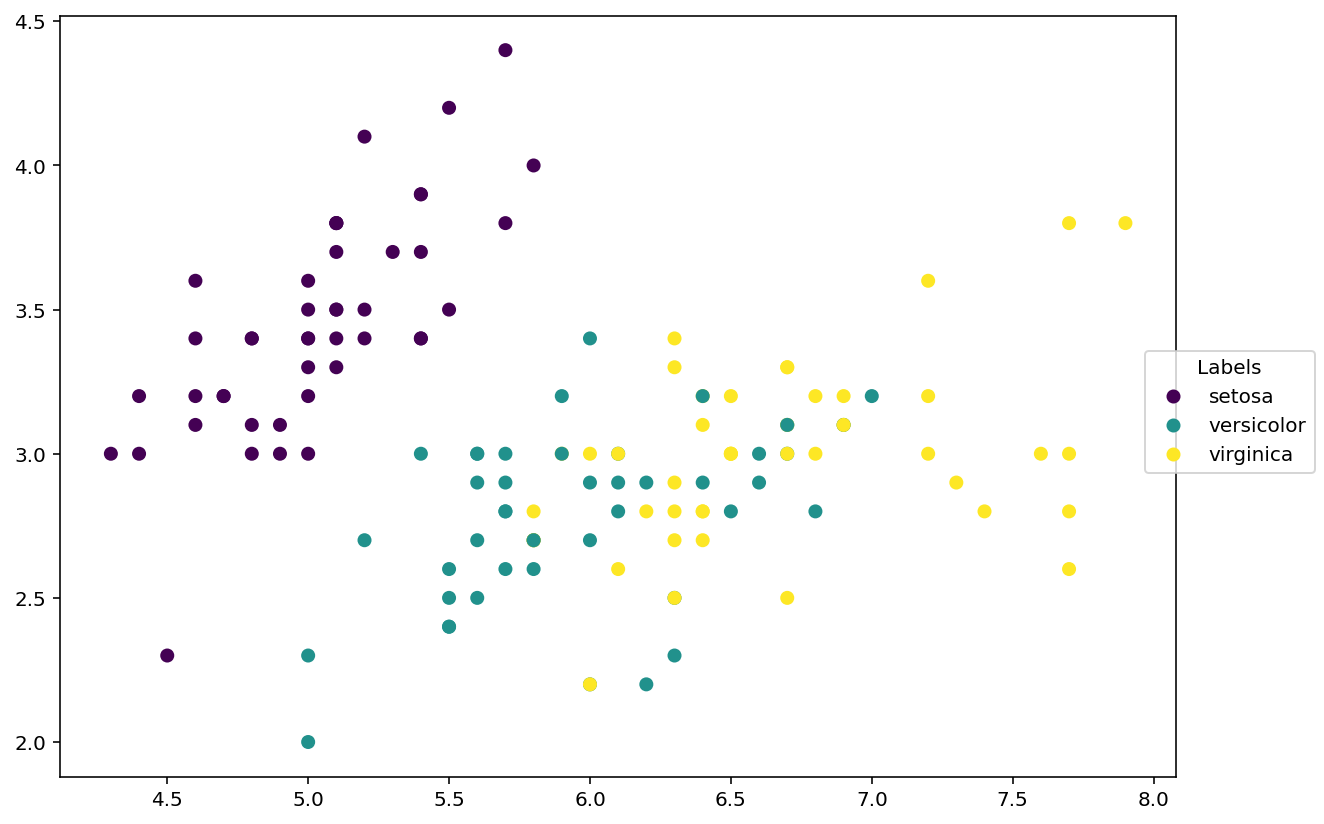

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot.
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

# Generate legends.
labels = ['setosa', 'versicolor', 'virginica']
_ = fig.legend(handles=scatter.legend_elements()[0], labels=labels,
               loc="right", title="Labels")

In [8]:
#| eval: false
y_pred = classify_kNN(X_test, X_train, y_train, k=10)

In [9]:
n_neighbors = 10
y_pred = list()
for row in X_test_norm:
    row_pred = classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
    y_pred.append(row_pred)
y_pred = np.array(y_pred)

In [10]:
n_neighbors = 10
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_norm])

In [11]:
acc = np.mean(y_pred == y_test)
acc

0.7333333333333333

In [12]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 10
clf = KNeighborsClassifier(n_neighbors, weights="uniform", metric="euclidean",
                           algorithm='brute')
clf.fit(X_train_norm, y_train)
y_pred_sk = clf.predict(X_test_norm)

acc = np.mean(y_pred_sk == y_test)
acc

0.7333333333333333

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
accuracy_score(y_pipe, y_test)

0.7333333333333333

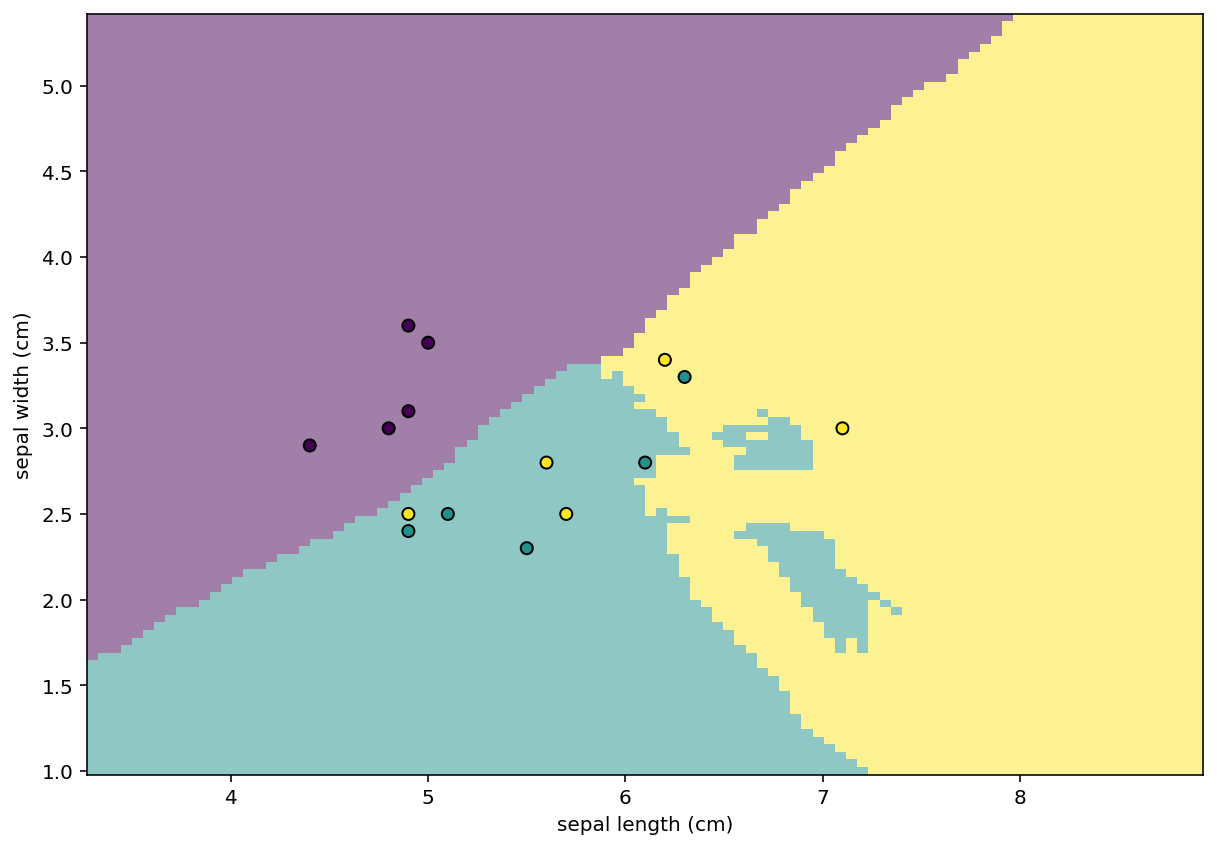

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
            pipe, 
            X_train,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel=iris.feature_names[0],
            ylabel=iris.feature_names[1],
            alpha=0.5)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")
disp.figure_.set_size_inches((10,7))

In [15]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipe, X, y, cv=5)
cv_scores

array([0.66666667, 0.8       , 0.63333333, 0.8       , 0.7       ])

In [16]:
np.mean(cv_scores)

0.7200000000000001

In [17]:
from sklearn.model_selection import GridSearchCV
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
clf.best_estimator_.get_params()["knn__n_neighbors"]

35

In [18]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
np.mean(cv_scores)

0.82

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./assests/datasets/datingTestSet2.txt', sep='\t', header=None)
df.head()

,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


In [20]:
df = df.rename(columns={0: "Mileage", 1: "Gamingtime", 2: 'Icecream', 3: 'Rating'})
df.head()

,Mileage,Gamingtime,Icecream,Rating
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


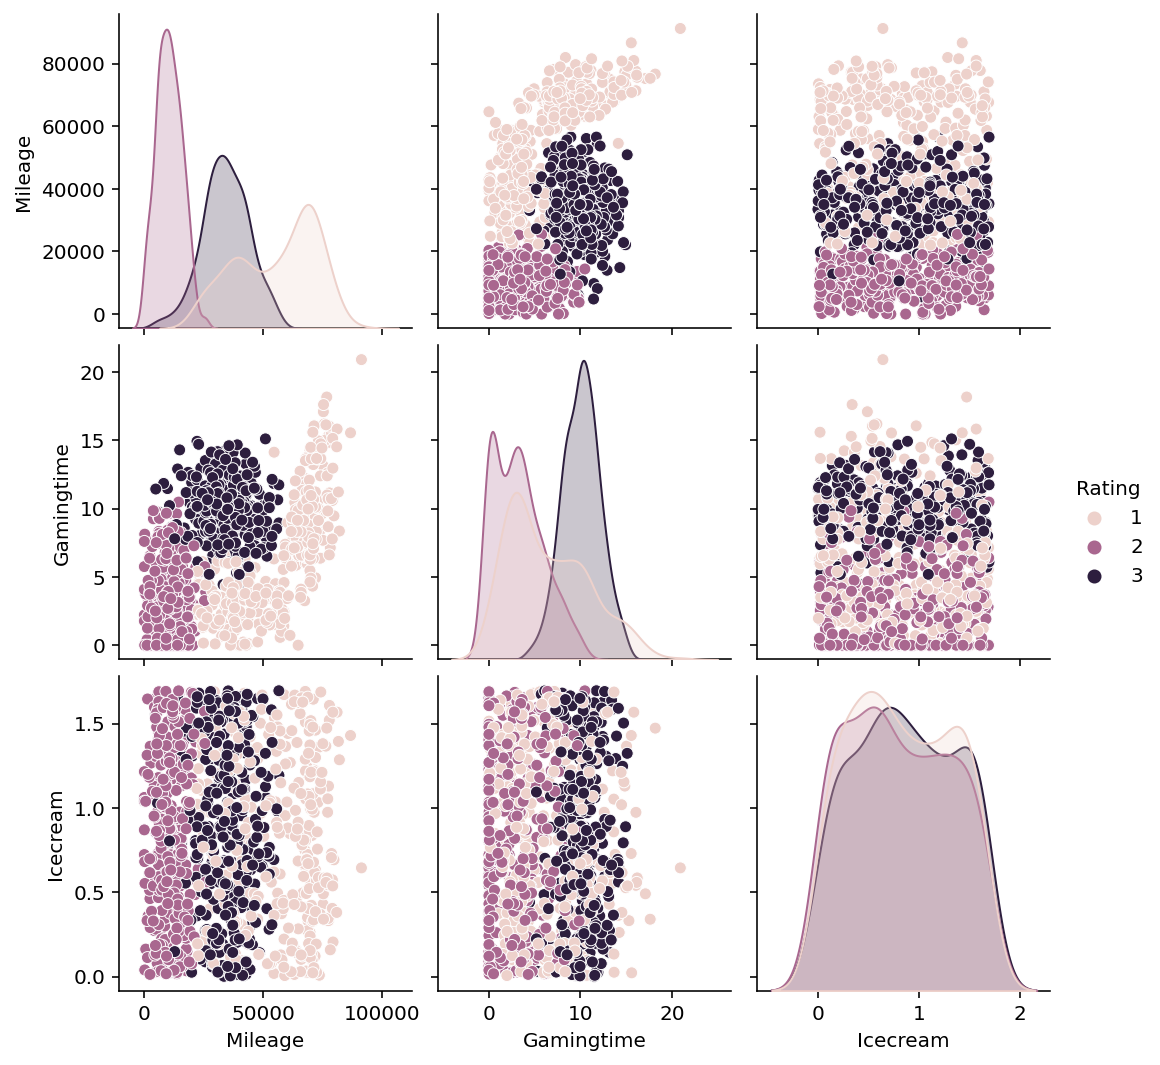

In [21]:
import seaborn as sns
sns.pairplot(data=df, hue='Rating')

In [22]:
from sklearn.model_selection import train_test_split
from assests.codes.knn import encodeNorm
X = np.array(df[['Mileage', 'Gamingtime', 'Icecream']])
y = np.array(df['Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40, stratify=y)

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

In [23]:
# Using our codes.
from assests.codes.knn import classify_kNN

n_neighbors = 10
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_norm])

acc = np.mean(y_pred == y_test)
acc

0.93

In [24]:
# Using sklearn.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
accuracy_score(y_pipe, y_test)

0.93

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score
n_list = list(range(1, 101))
parameters = dict(knn__n_neighbors=n_list)
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)
clf.best_estimator_.get_params()["knn__n_neighbors"]

4

In [26]:
cv_scores = cross_val_score(clf.best_estimator_, X, y, cv=5)
np.mean(cv_scores)

0.952

In [27]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X = datasets.load_digits().images
y = datasets.load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))

(1527, 8, 8)
(1527,)
(270, 8, 8)
(270,)
<class 'numpy.ndarray'>


In [29]:
#| echo: false
#| output: false
tr0 = X_train.shape[0]
te0 = X_test.shape[0]
yt0 = y_train[0]

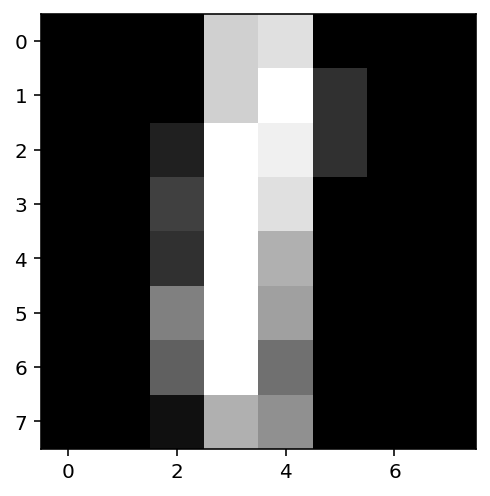

In [30]:
digit = X_train[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap='gray')

In [31]:
y_train[0]

1

In [32]:
from assests.codes.knn import encodeNorm

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_train_norm, parameters = encodeNorm(X_train)
X_test_norm, _ = encodeNorm(X_test, parameters=parameters)

In [33]:
from assests.codes.knn import classify_kNN
import numpy as np

n_neighbors = 10
X_test_sample = X_test_norm
y_test_sample = y_test
y_pred = np.array([classify_kNN(row, X_train_norm, y_train, k=n_neighbors)
                   for row in X_test_sample])

acc = np.mean(y_pred == y_test_sample)
acc

0.9666666666666667

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

steps = [('scaler', MinMaxScaler()),
         ('knn', KNeighborsClassifier(n_neighbors, weights="uniform",
                                      metric="euclidean", algorithm='brute'))]
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
y_pipe = pipe.predict(X_test)
accuracy_score(y_pipe, y_test)

0.9629629629629629

In [35]:
#| echo: false

import pandas as pd
name = ['x', '1.5', '2.5', '3.5', '4.5', '5.0', '5.5', '5.75', '6.5', '7.5', '10.5']
data = [['y', '+', '+', '-', '-', '-', '+', '+', '-', '+', '+']]
df = pd.DataFrame(data, columns=name)
df.style.hide(axis='index')

x,1.5,2.5,3.5,4.5,5.0,5.5,5.75,6.5,7.5,10.5
y,+,+,-,-,-,+,+,-,+,+
